In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
imbalance_data=pd.read_csv('imbalanced_data.csv')

In [3]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
imbalance_data.drop('id',axis=1, inplace=True)

In [5]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
imbalance_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

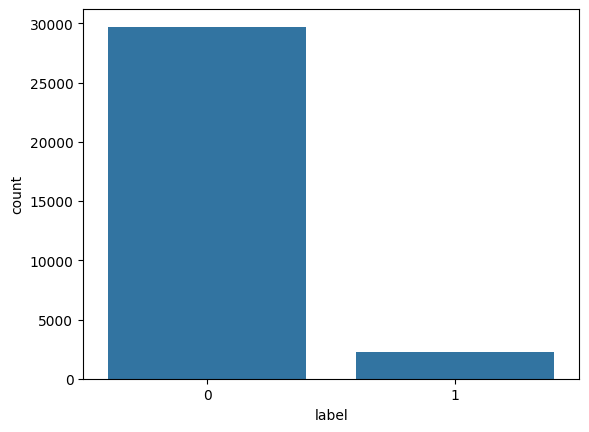

In [7]:
sns.countplot(x='label', data=imbalance_data)

In [8]:
imbalance_data.shape

(31962, 2)

In [9]:
imbalance_data.isnull().sum()

label    0
tweet    0
dtype: int64

In [10]:
imbalance_data.duplicated().sum()

2432

In [11]:
imbalance_data[imbalance_data.duplicated()]

,label,tweet
46,0,#model i love u take with u all the time in ...
96,0,#model i love u take with u all the time in ...
117,0,#model i love u take with u all the time in ...
162,0,#model i love u take with u all the time in ...
218,0,#model i love u take with u all the time in ...
...,...,...
31886,0,100 amazing health benefits of cucumbers! #...
31904,0,#model i love u take with u all the time in ...
31930,1,@user #feminismiscancer #feminismisterrorism #...
31951,0,i've just posted a new blog: #secondlife #lone...


In [12]:
imbalance_data.drop_duplicates(inplace=True, keep='first')

In [13]:
imbalance_data.duplicated().sum()

0

In [54]:
# Lets load another dataset similar to out dataset, since we want to fix the imbalance data.
raw_data=pd.read_csv("raw_data.csv")

In [55]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [56]:
raw_data.shape

(24783, 7)

In [57]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [58]:
raw_data.duplicated().sum()

0

In [59]:
raw_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [60]:
raw_data.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

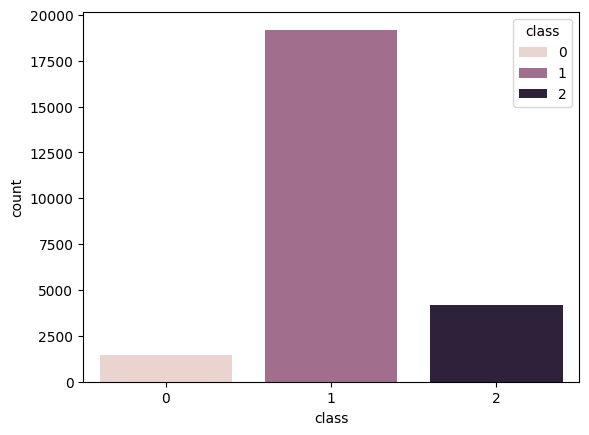

In [61]:
sns.countplot(x='class', data=raw_data, hue='class')

## InThis dataset
- 0 - Hate.
- 1 - abusive
## we consider 0,1 as hate speech.

In [22]:
raw_data[raw_data['class']==0]['calss']=1

<ipython-input-22-9e27b9e515c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['calss']=1


In [62]:
raw_data['class'].unique()

array([2, 1, 0])

In [63]:
raw_data['class'].replace({0:1}, inplace=True)

In [64]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

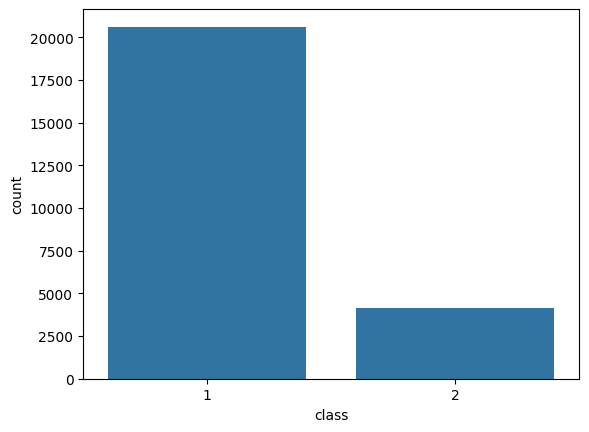

In [65]:
sns.countplot(x='class', data=raw_data)

In [66]:
raw_data[raw_data['class']==1][0:5]

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [67]:
## Rename the column of raw_data
raw_data.rename(columns={'class':'label'}, inplace=True)

In [68]:
raw_data.columns

Index(['label', 'tweet'], dtype='object')

In [70]:
hate_1=raw_data[raw_data['label']==1]

In [71]:
hate_1.head()

,label,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [72]:
balance_data=pd.concat([hate_1, imbalance_data])

In [73]:
balance_data['label'].unique()

array([1, 0])

In [74]:
balance_data['label'].value_counts()

0    27517
1    22633
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

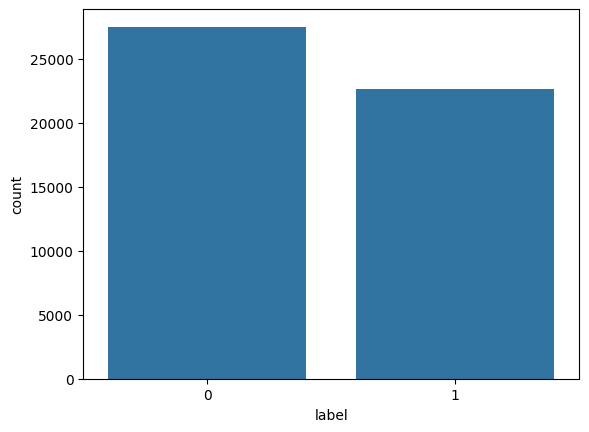

In [75]:
sns.countplot(x='label', data=balance_data)

## Now we can see that the problem of  imbalance data has been solved.

In [76]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [91]:
## Lets apply stemming and stopwords on the data.
stemmer=nltk.SnowballStemmer("english")
# stopword=dict[stopwords.words('english')]
stopword=set(stopwords.words('english'))

In [86]:
# stopword

In [89]:
import re
import string

In [92]:
# lets apply regex and do cleaning
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [93]:
balance_data['tweet']=balance_data['tweet'].apply(data_cleaning)

In [95]:
balance_data['tweet'][0]

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run

In [96]:
x=balance_data['tweet']
y=balance_data['label']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42)

In [99]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37612,), (12538,), (37612,), (12538,))

In [101]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences

In [102]:
"""
max_words=50000: This sets the maximum number of words to keep in the vocabulary.
Only the most frequent max_words words will be kept in the vocabulary,
and less frequent words will be ignored.
"""

max_words=50000
max_len=300

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

"""
It is used to convert a list of texts (sentences or documents) into sequences
of integers. Each word in the text is replaced with its corresponding integer
index from the tokenizer's internal vocabulary.
"""

sequences=tokenizer.texts_to_sequences(x_train)
sequences=pad_sequences(sequences, maxlen=max_len)


In [106]:
sequences[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [113]:
# Creating model architecture
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [110]:
model=Sequential()
# The Embedding layer is responsible for learning a dense representation of words in your vocabulary.
model.add(Embedding(max_words, 100, input_length=max_len))
#Each word is represented by a vector of real numbers (embeddings) in a high-dimensional space (in this case, 100 dimensions).
# The input_length parameter ensures that sequences of a consistent length are fed into the network.
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
history=model.fit(sequences, y_train, epochs=1, batch_size=128)

294/294 [==============================] - 345s 1s/step - loss: 0.2153 - accuracy: 0.9164


In [118]:
history

In [120]:
test_sequence_matrix=tokenizer.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequence_matrix, maxlen=max_len)

In [121]:
# Model evaluation
acc=model.evaluate(test_sequences_matrix, y_test)

392/392 [==============================] - 35s 86ms/step - loss: 0.1329 - accuracy: 0.9545


In [125]:
test_sequences_matrix

array([[ 3608,    60,   117, ...,    77,   808,    25],
       [    0,     0,     0, ...,  1149,   343,   173],
       [ 3873,     1,    63, ..., 14366,    61,    12],
       ...,
       [    0,     0,     0, ...,   437,  4845, 27286],
       [    0,     0,     0, ...,     5,    51,    30],
       [    0,     0,     0, ...,   205,    82,     9]], dtype=int32)

In [126]:
lstm_predication=model.predict(test_sequences_matrix)

392/392 [==============================] - 34s 85ms/step


In [127]:
lstm_predication

array([[0.997985  ],
       [0.01709536],
       [0.20498818],
       ...,
       [0.00304859],
       [0.9981841 ],
       [0.99885833]], dtype=float32)

In [130]:
res=[]
for pre in lstm_predication:
  if pre[0] <0.5:
    res.append(0)
  else:
    res.append(1)

In [131]:
res

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [133]:
print(confusion_matrix(y_test, res))

[[6672  199]
 [ 371 5296]]


In [135]:
import pickle
with open('tokenizr.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [145]:
# from tensorflow.keras.models import Sequential, save_model
# from keras.models import Model
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [151]:
import keras
load_model=keras.models.load_model("model.h5")
with open('tokenizr.pickle', 'rb') as handler:
  load_tockenizer=pickle.load(handler)

In [150]:
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [165]:
text1="fuck you mother fucker"
text=[clean_text(text1)]


fuck you mother fucker
fuck you mother fucker


In [166]:
text

['fuck mother fucker']

In [167]:
seq=load_tockenizer.texts_to_sequences(text)

In [168]:
seq

[[67, 749, 5304]]

In [169]:
padded=pad_sequences(seq, maxlen=300)

In [170]:
padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [171]:
pred=load_model.predict(padded)

1/1 [==============================] - 0s 70ms/step


In [172]:
if pred < 0.5:
  print("no hate")
else:
  print("hate speech or abusive")

hate speech or abusive
